# 23-08-2018, Italia, Toscana, Arezzo;
Premier notebook contenant mes informations globales de programmations.

Par Nicolas Cloutier


## Première partie - Widgets sous Jupyter Notebook

L'installation des widgets nécessite deux maniulations: 

I. L'une sur le kernel

II.L'autre sur le front end

In [1]:
#TEXT INSERTION WIDGETS
#Appel de fonction
from ipywidgets import widgets
from IPython.display import display

text=widgets.Text()
display(text)

def handle_submit(sender):
    print(text.value)
    
text.on_submit(handle_submit)    

Text(value='')

In [2]:
#BUTTON WIDGETS
#Appel de fonction
#from ipywidgets import widgets
#from IPython.display import display

button=widgets.Button(description="Click Me!")
display(button)

def on_button_clicked(b):
    print("Button clicked.")
    
    
button.on_click(on_button_clicked)


Button(description='Click Me!', style=ButtonStyle())

In [3]:
#SLIDER AND CHECK BOX WIDGETS
#Appel de fonction
#from ipywidgets import widgets
#from IPython.display import display
from ipywidgets import interact
def f(x):
    return x
interact(f,x=widgets.IntSlider(min=-10,max=30,step=1,value=10))
interact(f,x=False);    

interactive(children=(IntSlider(value=10, description='x', max=30, min=-10), Output()), _dom_classes=('widget-…

interactive(children=(Checkbox(value=False, description='x'), Output()), _dom_classes=('widget-interact',))

In [4]:
#SLIDER MULTI-VARIABLES
#Appel de fonction
#from ipywidgets import widgets
#from IPython.display import display

def g(x, y):
    return (x, y)

interact(g,x=widgets.IntSlider(min=0,max=10,step=1,description='Température',value=5), y=widgets.IntSlider(min=0,max=10,step=1,description='Volt',value=5))

def h(x,y):
    return(x,y)

interact(h,x=widgets.FloatSlider(min=0.0,max=1.0,step=0.1,value=0.5), y=widgets.FloatSlider(min=0.0,max=1.0,step=0.1,value=0.5));


interactive(children=(IntSlider(value=5, description='Température', max=10), IntSlider(value=5, description='V…

interactive(children=(FloatSlider(value=0.5, description='x', max=1.0), FloatSlider(value=0.5, description='y'…

In [5]:
#DROP DOWN MENU PASSING NON-STRING VALUE
#Appel de fonction
#from ipywidgets import widgets
#from IPython.display import display
interact(f, x=[('one', 10), ('two', 20)]);


interactive(children=(Dropdown(description='x', options=(('one', 10), ('two', 20)), value=10), Output()), _dom…

In [6]:
#ANIMATION
#Appel de fonction
#from ipywidgets import widgets
#from IPython.display import display
play = widgets.Play(value=50,min=0,max=100,step=1,description="Press play",disabled=False)
slider = widgets.IntSlider()
widgets.jslink((play, 'value'), (slider, 'value')) #liéer deux widgets, jusqu'à séparation
widgets.HBox([play, slider])

## Deuxième partie - Jupyter Notebook interactif en ligne

Jupyter Notebook interactif (nbinteract) en ligne en liaison Binder jusqu'à GitHub 

Forme d'un lien GitHub: https://(user_name).github.io/(repository)/(code_name).html

Exemple: https://aram1skun.github.io/nbinteract-tutorial/Main.html

Problème de l'exemple ne montrant pas les widgets...

Binder URL de mon JupyterHub à partir de mon GitHub: https://mybinder.org/v2/gh/Aram1skun/nbinteract-tutorial/master

##### Pour sauvegarder les changements, dans un nouveau terminal: 

git add -A

git commit -m -a (-a for all or precise with 'Main.ipynb' for exemple)

git push origin master

## Troisième partie - Notation symbolique 
#### Présentation symbolique avec notation LATEX dans une cellule markdown
$$e^{i\pi} + 1 = 0$$
$$e^x=\sum_{i=0}^\infty \frac{1}{i!}x^i$$

#### Résolution symbolique avec SymPy 

In [7]:
from sympy import *
init_printing()
var('x y z a')

solve(x**2 - a, x)

## Quatrième partie - Cacher les code inputs dans un bouton

In [8]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

#### Insérer une image dans une cellule code

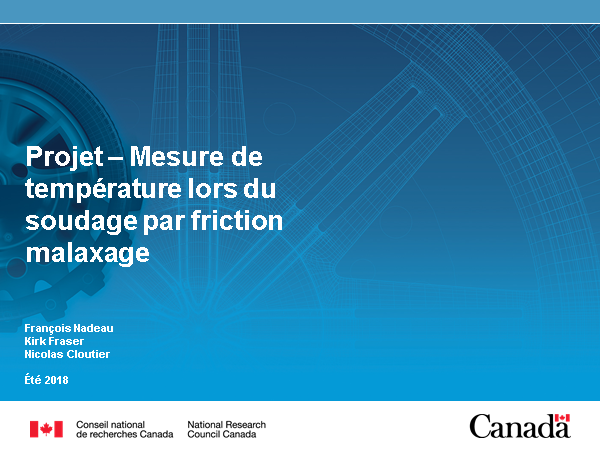

In [9]:
from IPython.display import Image
Image("Page1.png")

![title](Page1.png)

In [10]:
%%HTML
<img src="Page1.png" style="height:600px">

#### Run a python code from the repository and time for running a cell

In [11]:
%%time
%run test.py

Hello world
CPU times: user 2 ms, sys: 414 µs, total: 2.41 ms
Wall time: 1.37 ms


In [12]:
# %load test.py
"""
Created on Thu Aug  9 14:54:42 2018

@author: cloutiern
"""

print("Hello world")


Hello world


#### Semicolon at the end of a statement remove the undesire output

# Cinquième partie - Slider linked to multiple trace

In [13]:
import plotly

plotly.offline.init_notebook_mode()

trace1 = dict(
    type='scatter',
    x=[0, 1],
    y=[0, 0.5]
)
trace2 = dict(
    type='scatter',
    x=[0, 1],
    y=[0, -0.5]
)

trace3 = dict(
    type='scatter',
    x=[0, 1],
    y=[0, 1]
)
trace4 = dict(
    type='scatter',
    x=[0, 1],
    y=[0, -1]
)

steps = [None, None]
steps[0] = dict(
    method='restyle',
    args=[
        'visible', [False, True]
    ],
)
steps[1] = dict(
    method='restyle',
    args=[
        'visible', [True, False]
    ],
)

sliders = dict(
    steps=steps
)

layout = dict(
    sliders=[sliders],
    xaxis=dict(
        range=[0, 1],
    ),
    yaxis=dict(
        range=[-1, 1],
    ),
)

data = plotly.graph_objs.Data([trace1, trace2, trace3, trace4])
fig = plotly.graph_objs.Figure(data=data, layout=layout)

# plotly.offline.plot(fig, filename='manipulate.html')
plotly.offline.iplot(fig)

ModuleNotFoundError: No module named 'plotly'